# COM2004/3004 - Getting Started

*Copyright &copy; 2023 University of Sheffield. All rights reserved*.


## Objectives

* To introduce a classification task using real data.
* To learn how to use python's matplotlib module to visualize 1- and 2-D distributions.

## Introduction

In this module we will be using Jupyter notebooks to teach data driven computing techniques using the Python programming language. The main aim of the lab classes is to show how concepts that are being learnt from a theoretical perspective in the lectures can be put to practical use on real data sets. In this first lab you will be looking at the problem of diagnosing liver disease from blood test results.


## Loading the data

In this notebook we are going to be experimenting with a set of medical data concerned with the diagnosis of liver disease. The data can be loaded directly from the web into this Jupyter notebook session, without having to first download it, by using the code in cell below.

To execute code the code,

1. click on the cell so that it becomes the current cell (a coloured border should appear around it)
2. **either** click on the 'run cell' button (the black triangle in the tool bar above) **or** press shift and return.


In [1]:
%pip install numpy
import numpy as np

data = np.loadtxt(open("data/liver_data.txt", "rb"), delimiter=",")


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/98/d7/1cc7a11118408ad21a5379ff2a4e0b0e27504c68ef6e808ebaa90ee95902/numpy-1.26.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.1 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 61.1/61.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 13.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/15.5 MB 11.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.5 MB 11.4 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.5 MB 11.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/15.5 MB 11.8 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/15.5 MB 11.1 MB/s eta 0:00:02
   ---------- ----------

The `np.loadtext` command will load all the rows of comma-separated numbers from the file liver_data.txt and store them all in a matrix variable called data. (Note, the variable data did not need to be declared or given a type, or allocated memory.)

The code above is using numpy to read the data and is returning the data as a numpy array. Numpy is a Python module that provides powerful matrix and vector handling functions. We will be using it extensively in these lab classes.

## Understanding the data

The data concerns the diagnosis of liver disease. Seven different pieces of informations (7 columns) have been recorded from 345 patients (345 rows). We will talk about there being 345 *samples* and each sample having 7 *features*. The data in the seven columns has the following meaning,

1. mean corpuscular volume
2. alkaline phosphotase
3. alamine aminotransferase
4. aspartate aminotransferase
5. gamma-glutamyl transpeptidase
6. number of half-pint equivalents of alcoholic beverages drunk per day
7. Class label (1=healthy; 2=diseased)

The first five measurements are the results from blood tests (we do not need to worry about their precise meaning), the sixth concerns the patient’s alcohol consumption. The final column is a ‘class label’. A '1' in this column means the patient is healthy and a '2' means the patient has liver disease. The complete documentation for the data can be found here, http://archive.ics.uci.edu/ml/datasets/Liver+Disorders.

If designing a medical diagnostic test, our goal would be to try and predict the class label in the seventh column (healthy vs. diseased) given the patient data recorded in the first six columns (the blood tests and alcohol consumption), i.e., it is a classification task (data in, label out).

## Examining the data

Let us now look at one of the features in more detail. We can extract the $n$th column from a matrix $M$ and store it in a vector, $v$, using the Python numpy code,

    v = M[:, n]

So to extract the information about alcohol consumption (feature 6) we can run

In [2]:
drinks = data[:, 5]

(Note, feature 6 appears in column 5 because Python starts counting at 0.)

We can now plot this data using the plot command from Python's `matplotlib` plotting module. The `plot` command is in the `pylab` submodule of `matplotlib`. The `pylab` module is made available with an `import` statement.

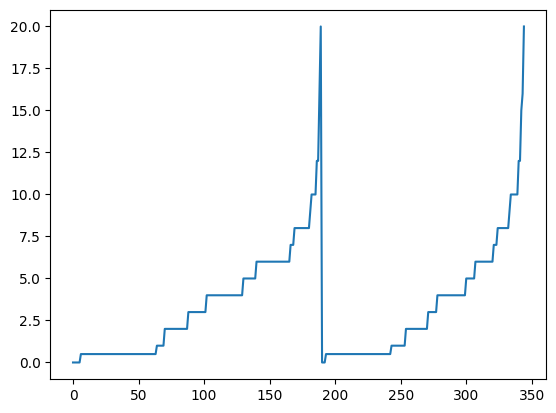

In [3]:
import matplotlib.pylab as plt

plt.plot(drinks)
plt.show()

<font size ="4"><u>Note:</u></font> the `plt.plot` line above ends with a semicolon. By default, the return value of the last line of a cell is printed when the cell is run. The semicolon suppresses this output, i.e., the semicolon is a Jupyter notebook feature. Python does **not** require semicolons at the end of each line of code.

When the above cell was executed the plot should have appeared directly beneath the cell. It will display the sample numbers along the $x$-axis (i.e., patient 1 to patient 345) and the patient's alcohol consumption on the $y$-axis. This is not a very helpful way of viewing the data. It would be more appropriate to use a histogram, i.e., a type of bar chart that represents the distribution of a set of values. To make a histogram we can use matplotlib's `hist` function,

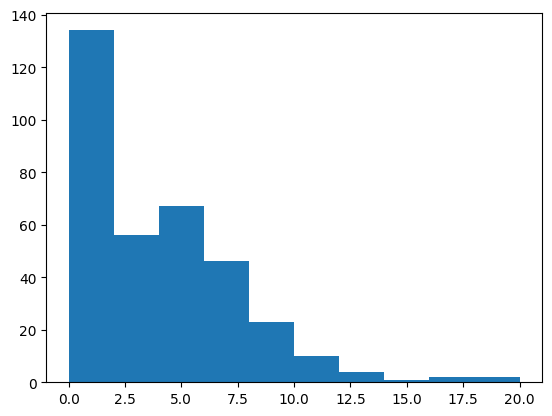

In [4]:
plt.hist(drinks)
plt.show()

Unfortunately by default the histogram has only 10 bars which is not enough to display the data precisely. The `hist` function has a parameter called `bins` that takes a vector that specifies the position of the boundary between each histogram bin. We want bins centered at 0, 1, 2, ..., 20, so we need to specify boundaries at -0.5, 0.5, 1.5, ..., 20.5. This is most easily done using python's `linspace` command which produces a sequence of evenly spaced values between two specified limits,

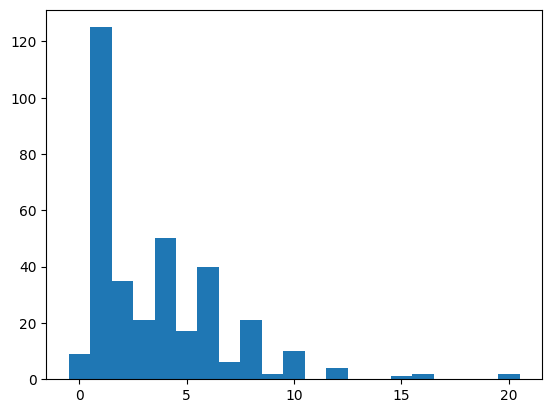

In [5]:
plt.hist(drinks, bins=np.linspace(-0.5, 20.5, 22))
plt.show()

You can make the figure a little clearer by changing the range of the axes using the `xlim` function, try,

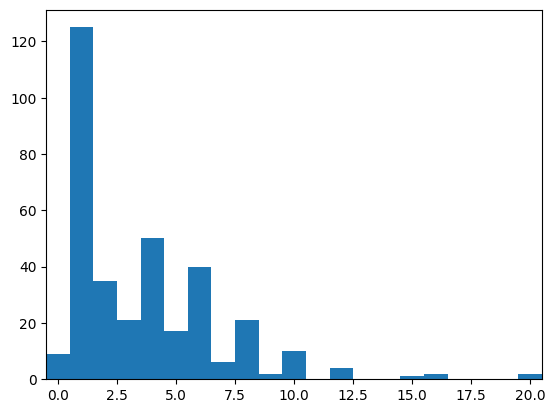

In [6]:
plt.hist(drinks, bins=np.linspace(-0.5, 20.5, 22))
plt.xlim([-0.5, 20.5])
plt.show()

So we can now see that the people in the dataset are drinking between 0 and 20 units of alcohol a day. The mode (i.e., the most common) value for consumption is 1 unit per day. (Where would you lie on this distribution?)

To calculate the average alcohol consumption use the command '`np.mean(drinks)`'. Try typing this in the empty cell below,

In [8]:
# Write your solution here
alcohol_mean = np.mean(drinks)
print(alcohol_mean)

3.455072463768116


## Using the class label

In the previous section we looked at the distribution of alcohol consumption for all 345 people. We now want to look at separate histograms for healthy and diseased people. Remember the class label is in column 7. We can make Python test whether the entries in a column match a specific number, say for example 1, by using syntax like,

In [9]:
data[:, 6] == 1

array([ True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Take care to note that it is == and not =.

The results are returned as a vector of 1’s (true) and 0’s (false). This single line of code effectively performed 345 comparisons and returned 345 results all in one go.

We can store these results in a variable,

In [10]:
wellPeople = data[:, 6] == 1

We can use these Booleans values to select the rows belonging to the healthy people from one of the columns of our data matrix, e.g., to select the column 6 data for just the healthy people,

In [11]:
wellDrinks = data[wellPeople, 5]

or putting it all in one line,

In [12]:
wellDrinks = data[data[:, 6] == 1, 5]

and similarly,

In [13]:
illDrinks = data[data[:, 6] == 2, 5]

Now we want to compare the histograms for these two classes. We can place two plots in the same window using the `subplot` command. See [here](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) for subplot documentation.

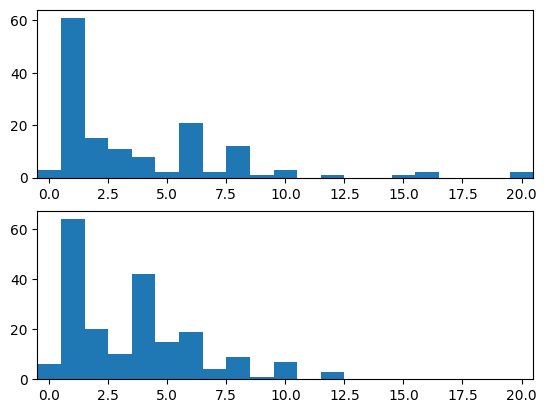

In [14]:
plt.subplot(2, 1, 1)
plt.hist(wellDrinks, bins=np.linspace(-0.5, 20.5, 22))
plt.xlim(-0.5, 20.5)
plt.subplot(2, 1, 2)
plt.hist(illDrinks, bins=np.linspace(-0.5, 20.5, 22))
plt.xlim(-0.5, 20.5)
plt.show()

Compare the two histograms. Are you surprised by how they appear? Is alcohol consumption by itself a good predictor of liver disease?

## Writing functions

So far we looked at the distribution of the 'number of drinks' feature (i.e., feature index 6) for the well and unwell classes. Let's say we now want to look at the distribution for another feature. We'd need to repeat the commands executed so far but using an index other than 6. It would be conveninet to place these commands in a function body. We could then pass the data and the feature index as parameters of the function. We can then call the function with different index values and see how different features are distributed.

Try implementing this function in the cell below. Hint, use the Python `def` command to start a new function. Most of the lines for the function body can be cut and paste from above. Where a '5' has been used to specify the feature index, we will need to replace the '5' with the function's feature index parameter variable.

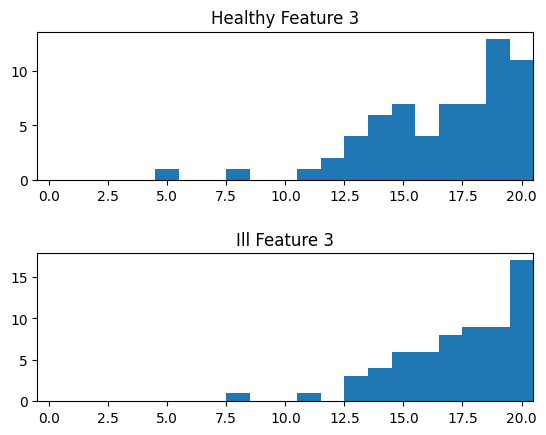

In [30]:
# Write your solution here
def plot_distributions(dataSet , featureNum):
    healthyFeature = dataSet[dataSet[ : , 6 ] == 1,featureNum]
    illFeature = dataSet[dataSet[ : , 6 ] == 2,featureNum]
    plt.subplot(2, 1, 1)
    plt.subplots_adjust(hspace=0.5)
    plt.title("Healthy Feature " + str(featureNum) )
    plt.hist(healthyFeature, bins=np.linspace(-0.5, 20.5, 22))
    plt.xlim(-0.5, 20.5)
    plt.subplot(2, 1, 2)
    plt.title("Ill Feature " + str(featureNum))
    plt.hist(illFeature, bins=np.linspace(-0.5, 20.5, 22))
    plt.xlim(-0.5, 20.5)
    plt.show()

# test code
plot_distributions(data, 3)

Which feature appears to be the best for distinguishing between the two classes? i.e., which feature generates a pair of histograms with the smallest overlap?

## Looking at pairs of features using a scatter plot.

You’ll probably find that no one feature is very useful in isolation. The classes will be better separated if we use more features. When looking at one dimension we can visualize the data distribution using a histogram. When looking at the distribution of a pair of features it is often better to use a scatter plot. With a scatter plot the pair of features are represented as a point on a 2-D plane, i.e., each sample is plotted on the plane at a position that represents the value of the sample’s features.

Let’s say that we want to look at feature 4 and feature 5 (stored in columns 3 and 4). Again, we will separate the healthy people from the diseased people,

In [31]:
wellFeatureX = data[data[:, 6] == 1, 3]
wellFeatureY = data[data[:, 6] == 1, 4]

We can now plot these against each other using,

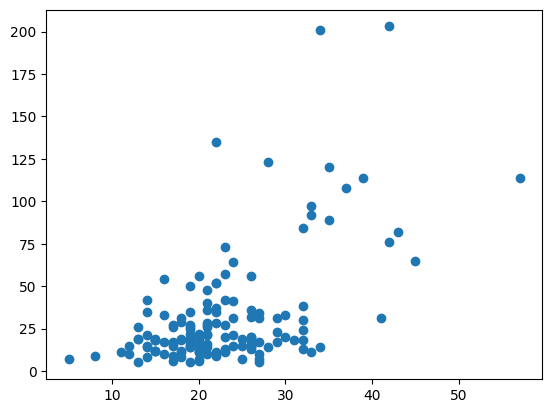

In [32]:
plt.scatter(wellFeatureX, wellFeatureY)
plt.show()

Examine how the healthy patients are spread. We can now do the same for the diseased patients by changing the '== 1' to '== 2', i.e.,

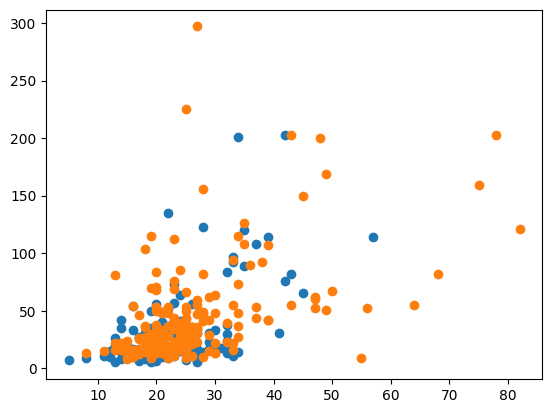

In [33]:
illFeatureX = data[data[:, 6] == 2, 3]
illFeatureY = data[data[:, 6] == 2, 4]
plt.scatter(wellFeatureX, wellFeatureY)
plt.scatter(illFeatureX, illFeatureY)
plt.show()

The problem now is that both sets of data are plotted using the same symbol so we can’t see which is which. To use a different symbol and/or colour you can provide `scatter` with extra parameters. The parameter 'c' can be used to specify a colour, 'marker' can be used to specify a marker style and 's' is an integer that specifies the marker size.

The example below uses green crosses for the healthy people and red dots for the diseased people,

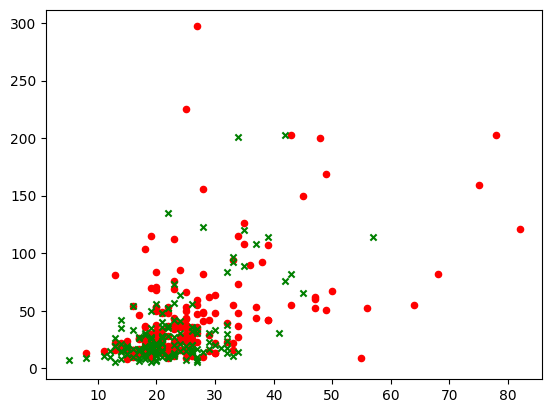

In [37]:
plt.scatter(illFeatureX, illFeatureY, s=20, c="r", marker="o")
plt.scatter(wellFeatureX, wellFeatureY, s=20, c="g", marker="x")
plt.show()

How well are the two classes separated by this pair of features?

We can now generalise the code we have written by writing a python function that takes the data and the indexes of any two features that we want to compare.

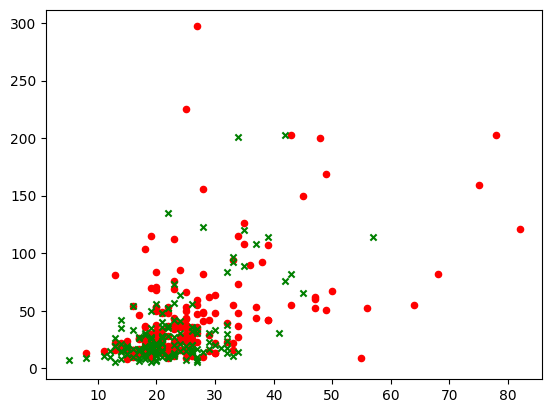

In [75]:
def compare_features(data, f1, f2):
    wellFeatureX = data[data[:, 6] == 1, f1]
    wellFeatureY = data[data[:, 6] == 1, f2]
    illFeatureX = data[data[:, 6] == 2, f1]
    illFeatureY = data[data[:, 6] == 2, f2]
    plt.scatter(illFeatureX, illFeatureY, s=20, c="r", marker="o")
    plt.scatter(wellFeatureX, wellFeatureY, s=20, c="g", marker="x")


# call compare_features to test the function
compare_features(data, 3, 4)

Once the function has been defined we can use it later in the notebook. For example the next cell uses the function to compare several different pairs of features,

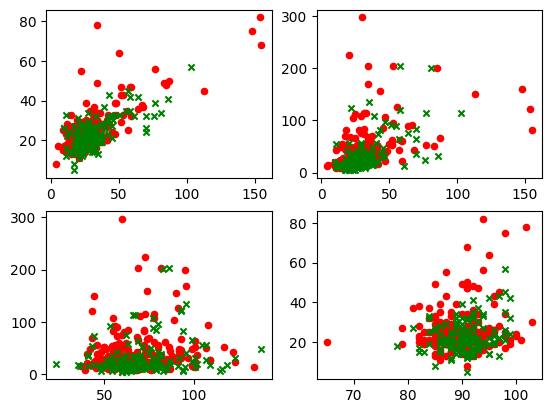

In [76]:
plt.subplot(2, 2, 1)
compare_features(data, 2, 3)
plt.subplot(2, 2, 2)
compare_features(data, 2, 4)
plt.subplot(2, 2, 3)
compare_features(data, 1, 4)
plt.subplot(2, 2, 4)
compare_features(data, 0, 3)
plt.show()

Now using a nested loop and the compare_features function write a piece of code that will systematically compare all six features against each other and present the result as a six by six grid of scatter plots. Use the empty cell below.

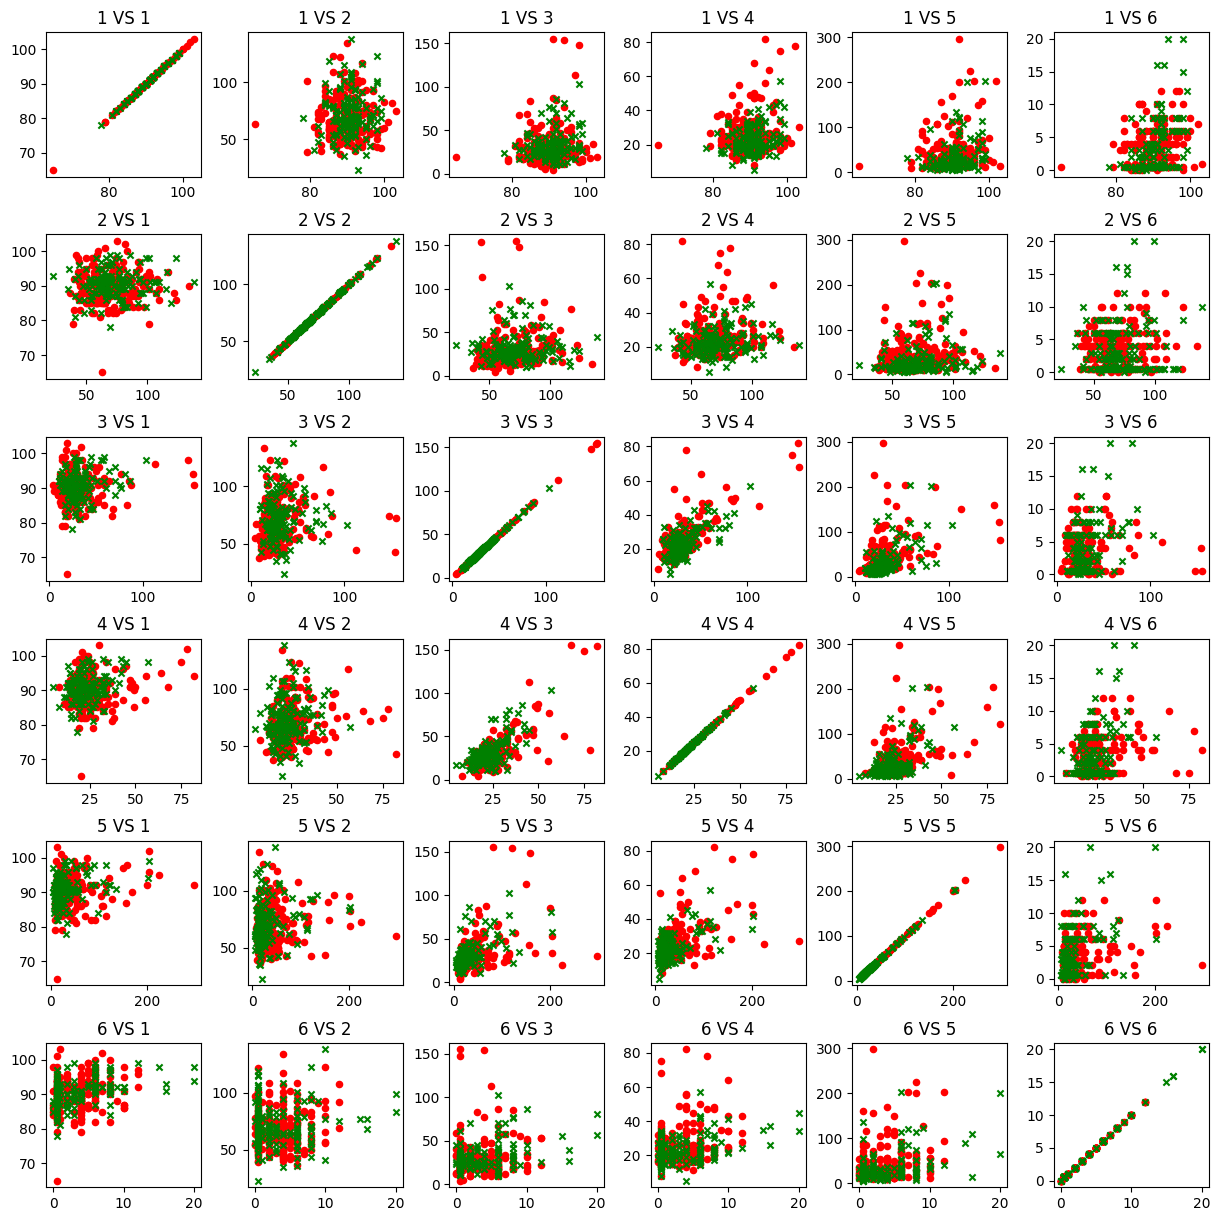

In [86]:
# Write your solution here
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.3,hspace= 0.4)
for i in range(6):
    for j in range(6):
        plt.subplot( 6, 6, i*6+(j+1))
        plt.title(str(i+1) + " VS " + str(j+1))
        compare_features(data, i, j)

## Summary

***Python***: We have used a Jupyter notebook to explore a small medical data set. We have seen how using Python and numpy we can store data in a matrix and how the data can be manipulated using a simple syntax. We have seen some of matplotlib's powerful plotting functions and used them to visualize some 1-D and 2-D data distributions using histograms and scatter plots.

***Classification***: We have been introduced to a simple classification task based on the diagnosis of liver disease using patient data. We have seen that for real world tasks it can be hard to find single features that clearly separate the classes we are interested in. We have seen that using more that one feature at a time can be a way of better separating the classes (i.e., the data in the 2-D scatter plots was less overlapped that the data in the 1-D histograms).